<a href="https://colab.research.google.com/github/sophia-zxy/CA05-logistic-regression/blob/main/CA05_logistic_regression_Xinyu_zhou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CA05 - Logistic Regression**
Name: Xinyu Zhou

Colab link: https://colab.research.google.com/drive/1P_CBwXiaXEFJBGrd4THtGNWEZ1Duivdc?usp=sharing

# Part 1- Logistic regression model

build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# Importing the dataset, slice independent and depedent variables
dataset = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Grid searching key hyperparametres
# Define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691764 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.691764 (0.025255) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.681171 (0.026677) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690942 (0.024495) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.691764 (0.025255) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.680862 (0.025179) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690943 (0.024963) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.691764 (0.025070) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.679938 (0.027130) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.687446 (0.025991) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.690839 (0.025125) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.681993 (0.026809) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.682608 (0.024753) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.687544 (0.022415) wit

In [ ]:
# Training the Logistic Regression model with best performance
classifier = LogisticRegression(random_state = 101,C =100,penalty='l2',solver='newton-cg')
classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# Part 2 - Display the feature importance

Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk 

In [ ]:
# Sorted in the order of decreasing influence on the CVD Risk
results = []
# get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
        results.append([v])
importance_df = pd.DataFrame(results, columns=["Score"])
importance_df.sort_values(by="Score",ascending=False)
	#print('Feature: %0d, Score: %.5f' % (i,v))

,Score
6,1.129536
2,0.199734
11,0.135913
14,0.115781
10,0.065354
12,0.052602
8,0.007421
0,-0.005970
9,-0.042787
13,-0.091538


In [ ]:
# feature importance in an original order
importance_df

,Score
0,-0.005970
1,-0.305473
2,0.199734
3,-0.126089
4,-0.612354
5,-0.199982
6,1.129536
7,-0.204974
8,0.007421
9,-0.042787


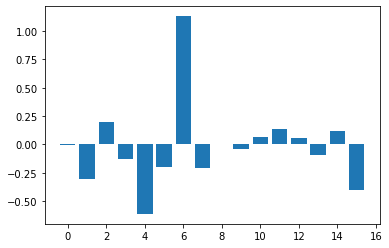

In [ ]:
# plot feature importance in an original order
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Part 3 - Evaluate the performance 

Evaluate the performance of your model (including ROC Curve), explain the performance anddraw a meaningful conclusion. 

(deliverable: Performance outputs in Notebook, explanation and conclusion in Word/PDF document)

From the confusion matrix, we know that 

true positives (TP):  we correctly predicted CVD Risk YES 393 times

true negatives (TN):  we correctly predicted CVD Risk NO 174 times

false positives (FP): we incorrectly predicted CVD Risk YES 177 times (a "Type I error")

false negatives (FN): we incorrectly predicted CVD Risk NO 67 times  (a "Type II error")

Our dataset is balanced from the f1 score(0.763). Our accuracy score is 0.699 Which is ok not every good. .AUC score is 0.675 which is acceptable. Our recall is 0.854 which is good number and it means we can 85.4% got correct positive predictions.Recall plus AUC will be a good option for evaluating model for detecting disease because it will ensure that true positive rate will be consistent across all threshold values and we can see how Recall will behave with respect to the desired threshold value. There is some improvement we can make, but that the best model we can get so far.

In [ ]:
# Making the Confusion Matrix
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#TN FP
#FN TP

[[174 177]
 [ 67 393]]


In [ ]:
#Accuracy, precision,recal, f-1 score
print('accuracy: {}'.format(accuracy_score(y_test, y_pred)))
precision, recall, fscore, support = score(y_test, y_pred,average='binary')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

accuracy: 0.6991368680641183
precision: 0.6894736842105263
recall: 0.8543478260869565
fscore: 0.7631067961165049


0.675037160906726


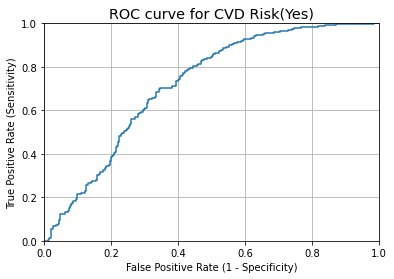

In [ ]:
# ROC Curve
from sklearn import metrics
print(metrics.roc_auc_score(y_test, y_pred))
#Receiver Operating Characteristic (ROC) Curves
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
probas_pred = classifier.predict_proba(X_test)
probas_pred = probas_pred[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, probas_pred)
plt.plot(lr_fpr, lr_tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for CVD Risk(Yes)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)